In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os

In [3]:
path_to_data = "./image_dataset/"

In [4]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [5]:
img_dirs

['./image_dataset/cristiano_ronaldo',
 './image_dataset/ibrahimovic',
 './image_dataset/lionel_messi',
 './image_dataset/mbappe',
 './image_dataset/neymar']

In [6]:
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'cristiano_ronaldo': ['./image_dataset/cristiano_ronaldo\\cristiano_ronaldo1.png',
  './image_dataset/cristiano_ronaldo\\cristiano_ronaldo10.png',
  './image_dataset/cristiano_ronaldo\\cristiano_ronaldo100.png',
  './image_dataset/cristiano_ronaldo\\cristiano_ronaldo101.png',
  './image_dataset/cristiano_ronaldo\\cristiano_ronaldo102.png',
  './image_dataset/cristiano_ronaldo\\cristiano_ronaldo103.png',
  './image_dataset/cristiano_ronaldo\\cristiano_ronaldo104.png',
  './image_dataset/cristiano_ronaldo\\cristiano_ronaldo105.png',
  './image_dataset/cristiano_ronaldo\\cristiano_ronaldo106.png',
  './image_dataset/cristiano_ronaldo\\cristiano_ronaldo107.png',
  './image_dataset/cristiano_ronaldo\\cristiano_ronaldo108.png',
  './image_dataset/cristiano_ronaldo\\cristiano_ronaldo109.png',
  './image_dataset/cristiano_ronaldo\\cristiano_ronaldo11.png',
  './image_dataset/cristiano_ronaldo\\cristiano_ronaldo110.png',
  './image_dataset/cristiano_ronaldo\\cristiano_ronaldo111.png',
  './ima

In [7]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cristiano_ronaldo': 0,
 'ibrahimovic': 1,
 'lionel_messi': 2,
 'mbappe': 3,
 'neymar': 4}

In [31]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        img = cv2.resize(img, (300, 300))
        X.append(img)
        y.append(class_dict[celebrity_name])

In [32]:
X = np.array(X)
y = np.array(y)

In [33]:
X.shape

(667, 300, 300, 3)

In [34]:
X[0]

array([[[ 18,  20,   1],
        [ 18,  20,   1],
        [ 18,  20,   1],
        ...,
        [ 38,  31,  52],
        [ 38,  31,  51],
        [ 37,  31,  48]],

       [[ 18,  20,   1],
        [ 18,  20,   1],
        [ 18,  20,   1],
        ...,
        [ 38,  31,  52],
        [ 38,  31,  51],
        [ 37,  31,  48]],

       [[ 18,  20,   1],
        [ 18,  20,   1],
        [ 18,  20,   1],
        ...,
        [ 38,  31,  52],
        [ 38,  31,  51],
        [ 37,  31,  48]],

       ...,

       [[127, 174, 136],
        [127, 174, 136],
        [127, 174, 136],
        ...,
        [ 17,  26,  25],
        [ 18,  27,  26],
        [ 32,  44,  44]],

       [[128, 175, 137],
        [128, 175, 137],
        [128, 175, 137],
        ...,
        [ 17,  25,  24],
        [ 18,  27,  26],
        [ 31,  43,  43]],

       [[128, 175, 137],
        [128, 175, 137],
        [128, 175, 137],
        ...,
        [ 17,  25,  24],
        [ 16,  24,  23],
        [ 15,  27,  27]]

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

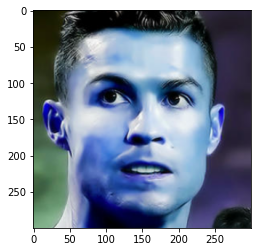

In [35]:
plt.imshow(X[0])

In [13]:
y[0]

0

In [14]:
import tensorflow_hub as hub
from tensorflow import keras

In [ ]:
IMAGE_SHAPE = (600,600)
classifier = keras.Sequential([
     hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b7/classification/1", input_shape=IMAGE_SHAPE+(3,))
])

In [36]:
X = X/255

In [37]:
X[0]

array([[[0.07058824, 0.07843137, 0.00392157],
        [0.07058824, 0.07843137, 0.00392157],
        [0.07058824, 0.07843137, 0.00392157],
        ...,
        [0.14901961, 0.12156863, 0.20392157],
        [0.14901961, 0.12156863, 0.2       ],
        [0.14509804, 0.12156863, 0.18823529]],

       [[0.07058824, 0.07843137, 0.00392157],
        [0.07058824, 0.07843137, 0.00392157],
        [0.07058824, 0.07843137, 0.00392157],
        ...,
        [0.14901961, 0.12156863, 0.20392157],
        [0.14901961, 0.12156863, 0.2       ],
        [0.14509804, 0.12156863, 0.18823529]],

       [[0.07058824, 0.07843137, 0.00392157],
        [0.07058824, 0.07843137, 0.00392157],
        [0.07058824, 0.07843137, 0.00392157],
        ...,
        [0.14901961, 0.12156863, 0.20392157],
        [0.14901961, 0.12156863, 0.2       ],
        [0.14509804, 0.12156863, 0.18823529]],

       ...,

       [[0.49803922, 0.68235294, 0.53333333],
        [0.49803922, 0.68235294, 0.53333333],
        [0.49803922, 0

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state=5)

In [39]:
feature_extracted_model = "https://tfhub.dev/google/efficientnet/b3/feature-vector/1"
pre_trained_model = hub.KerasLayer( feature_extracted_model, input_shape=(300,300,3),trainable=False)

In [40]:
num_of_footballers = 5

model = keras.Sequential([
    pre_trained_model,
    keras.layers.Dense(num_of_footballers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1536)              10783528  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 7685      
Total params: 10,791,213
Trainable params: 7,685
Non-trainable params: 10,783,528
_________________________________________________________________


In [44]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
5/5 [==============================] - 24s 4s/step - loss: 1.1321 - accuracy: 0.6015
Epoch 2/20
5/5 [==============================] - 22s 4s/step - loss: 1.0141 - accuracy: 0.7368
Epoch 3/20
5/5 [==============================] - 22s 4s/step - loss: 0.9436 - accuracy: 0.7820
Epoch 4/20
5/5 [==============================] - 22s 4s/step - loss: 0.8896 - accuracy: 0.8045
Epoch 5/20
5/5 [==============================] - 21s 4s/step - loss: 0.8310 - accuracy: 0.8195
Epoch 6/20
5/5 [==============================] - 22s 4s/step - loss: 0.7910 - accuracy: 0.8120
Epoch 7/20
5/5 [==============================] - 22s 4s/step - loss: 0.7432 - accuracy: 0.8271
Epoch 8/20
5/5 [==============================] - 22s 4s/step - loss: 0.7046 - accuracy: 0.8797
Epoch 9/20
5/5 [==============================] - 22s 4s/step - loss: 0.6829 - accuracy: 0.9023
Epoch 10/20
5/5 [==============================] - 22s 4s/step - loss: 0.6442 - accuracy: 0.9323
Epoch 11/20
5/5 [======================

In [45]:
model.evaluate(X_test,y_test)

17/17 [==============================] - 90s 5s/step - loss: 0.8629 - accuracy: 0.7060


[0.8628742098808289, 0.7059925198554993]

In [46]:
y_pred = model.predict(X_test)

In [69]:
X_test[:5]

array([[[[0.18823529, 0.2       , 0.28235294],
         [0.18823529, 0.2       , 0.28235294],
         [0.19215686, 0.20392157, 0.28627451],
         ...,
         [0.14117647, 0.49411765, 0.41960784],
         [0.14509804, 0.49803922, 0.42352941],
         [0.14509804, 0.49803922, 0.42352941]],

        [[0.18823529, 0.2       , 0.28235294],
         [0.18823529, 0.2       , 0.28235294],
         [0.19215686, 0.20784314, 0.29019608],
         ...,
         [0.14117647, 0.49411765, 0.41960784],
         [0.14509804, 0.49803922, 0.42352941],
         [0.14509804, 0.49803922, 0.42352941]],

        [[0.19607843, 0.20784314, 0.29019608],
         [0.19607843, 0.20784314, 0.29019608],
         [0.2       , 0.21176471, 0.29803922],
         ...,
         [0.14509804, 0.49803922, 0.42745098],
         [0.14901961, 0.50196078, 0.42745098],
         [0.14901961, 0.50196078, 0.42745098]],

        ...,

        [[0.24313725, 0.32156863, 0.40784314],
         [0.24313725, 0.32156863, 0.40784314]

In [47]:
y_pred[:5]

array([[-1.9661629 ,  1.8275955 ,  0.52275133,  1.5944852 , -2.4582324 ],
       [-1.196453  , -0.6313284 , -0.6306553 ,  1.6219141 , -2.0943062 ],
       [-0.15067603,  0.0129111 , -0.6050292 , -0.8880723 , -2.7765758 ],
       [-0.08088227, -0.45100796, -0.24510673, -0.07197549, -1.20534   ],
       [ 0.41674337, -0.5684272 , -0.86599904, -0.6840781 , -1.0801085 ]],
      dtype=float32)

In [48]:
y_preds = [np.argmax(i) for i in y_pred]
y_preds[:5]

[1, 3, 1, 3, 0]

In [49]:
y_test[:5]

array([3, 3, 1, 4, 0])

In [50]:
from sklearn.metrics import classification_reportcation_report

In [51]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72       134
           1       0.61      0.69      0.65       116
           2       0.71      0.66      0.69        89
           3       0.86      0.65      0.74        94
           4       0.85      0.68      0.76       101

    accuracy                           0.71       534
   macro avg       0.73      0.70      0.71       534
weighted avg       0.72      0.71      0.71       534



In [79]:
class_labels = ['Ronaldo','Ibrahmovic','Messi','Mbappe','Neymar']

In [101]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

In [178]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        return roi_color

In [160]:
def predicting(img_path):
    image = get_cropped_image_if_2_eyes(img_path)
    image = cv2.resize(image, (300,300))
    plt.axis('off')
    plt.imshow(image)
    image = image / 255
    pre = np.argmax(model.predict(np.array([image])))
    print(f"You look like {class_labels[pre]}")

You look like Messi


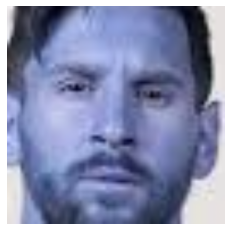

In [179]:
predicting('./messi_test.jpg')

You look like Ronaldo


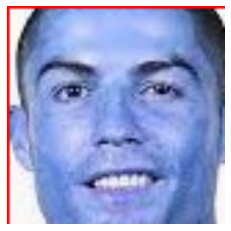

In [175]:
predicting('./cr7_test.jpg')

You look like Mbappe


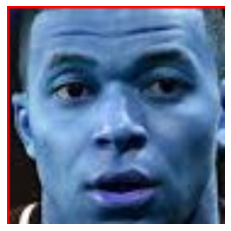

In [177]:
predicting('./mbappe_test.jpg')